In [1]:
import os.path
import keras.applications.mobilenet
from keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam
import PIL.Image
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/stanislav/Documents/notebooks/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/stanislav/Documents/notebooks/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/stanislav/Documents/notebooks/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/h

In [2]:
DATA_ROOT = os.path.expanduser("~/Documents/data/")
BATCH_SIZE = 8
STEPS_PER_EPOCH = 100
SIZE = 128

The model: two dense layers on top of a mobile Net

In [3]:
def new_model():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3), pooling='avg')
    x = base_model.output
    x = Dense(1024, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)
    return Model(inputs=base_model.input, outputs=x)

Training

In [27]:
def train(model, data_gen, directory, layer_count = None, params={},
          epochs=4, validation_directory=None, validation_generator=None):

    if layer_count == None:
        layer_count = len(model.layers)

    for layer in model.layers[: -layer_count]:
        layer.trainable = False

    for layer in model.layers[-layer_count:]:
        layer.trainable = True

    gen = data_gen.flow_from_directory(directory,
                                       class_mode='binary',
                                       target_size=(SIZE, SIZE), 
                                       batch_size=BATCH_SIZE)

    if validation_generator:
        val_gen = validation_generator.flow_from_directory(validation_directory,
                                                    class_mode='binary',
                                                           target_size=(SIZE, SIZE), 
                                                          batch_size=BATCH_SIZE)
    else:
        val_gen = None

    model.compile(**params)
    history = model.fit_generator(gen,
                        epochs=epochs,
                        steps_per_epoch=STEPS_PER_EPOCH,
                        validation_data=val_gen)
    
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [5]:
def dense_params1():
    return {'optimizer': 'rmsprop',
               'loss': 'binary_crossentropy',
               'metrics': ['accuracy']}

In [6]:
def base_params1():
    return {'optimizer': SGD(lr=0.0001, momentum=0.9),
              'loss': 'binary_crossentropy',
              'metrics': ['accuracy']}

In [7]:
dg_train = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input)
dg_val = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input)

In [8]:
model = new_model()
model.summary()








Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)      

In [9]:
train(model, dg_train, os.path.join(DATA_ROOT, 'part1'),
      params=dense_params1(),
      layer_count = 2,
      validation_directory=os.path.join(DATA_ROOT, 'part2'),
      validation_generator=dg_val)
train(model, dg_train, os.path.join(DATA_ROOT, 'part1'),
      params=base_params1(),
      layer_count = 19,
      validation_generator=dg_val,
      validation_directory=os.path.join(DATA_ROOT, 'part2'))

Found 4000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/4
100/100 [==============================] - 14s 139ms/step - loss: 3.3163 - acc: 0.6838 - val_loss: 0.2965 - val_acc: 0.9038
Epoch 2/4
100/100 [==============================] - 13s 128ms/step - loss: 0.3756 - acc: 0.8662 - val_loss: 0.0738 - val_acc: 0.9738
Epoch 3/4
100/100 [==============================] - 13s 127ms/step - loss: 0.2708 - acc: 0.8950 - val_loss: 0.0611 - val_acc: 0.9712
Epoch 4/4
100/100 [==============================] - 14s 140ms/step - loss: 0.3704 - acc: 0.8688 - val_loss: 0.0803 - val_acc: 0.9700
Found 4000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 18s 182ms/step - loss: 0.2700 - acc: 0.8888 - val_loss: 0.0663 - val_acc: 0.9738
Epoch 2/4
100/100 [==============================] - 16s 162ms/step -

model2: Change RMSprop to Adam.

In [10]:
def dense_params2():
    return {'optimizer': Adam(),
               'loss': 'binary_crossentropy',
               'metrics': ['accuracy']}
def base_params2():
    return {'optimizer': Adam(lr=0.0001),
              'loss': 'binary_crossentropy',
              'metrics': ['accuracy']}

In [11]:
model2 = new_model()

In [12]:
train(model2, dg_train, os.path.join(DATA_ROOT, 'part1'),
      params=dense_params2(),
      layer_count=2,
      validation_directory=os.path.join(DATA_ROOT, 'part2'),
      validation_generator=dg_val)
train(model2, dg_train, os.path.join(DATA_ROOT, 'part1'),
      params=base_params2(),
      layer_count=19,
      epochs=6,
      validation_generator=dg_val,
      validation_directory=os.path.join(DATA_ROOT, 'part2'))

Found 4000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 14s 140ms/step - loss: 0.3452 - acc: 0.8675 - val_loss: 0.1013 - val_acc: 0.9700
Epoch 2/4
100/100 [==============================] - 13s 129ms/step - loss: 0.2938 - acc: 0.8962 - val_loss: 0.0752 - val_acc: 0.9700
Epoch 3/4
100/100 [==============================] - 13s 131ms/step - loss: 0.2656 - acc: 0.8875 - val_loss: 0.1128 - val_acc: 0.9600
Epoch 4/4
100/100 [==============================] - 13s 130ms/step - loss: 0.2249 - acc: 0.9062 - val_loss: 0.1925 - val_acc: 0.9225
Found 4000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/6
100/100 [==============================] - 17s 173ms/step - loss: 0.1684 - acc: 0.9313 - val_loss: 0.0938 - val_acc: 0.9663
Epoch 2/6
100/100 [==============================] - 16s 162ms/step - loss: 0.2482 - acc: 0.9062 - val_loss: 0.1167 - val_acc: 0.9563
Epoch 3/6
100/100 [===========

model3: max pooling instead of average pooling requires smaller learning rate
The Dense layer is involved

In [21]:
def dense_params3():
    return {'optimizer': Adam(lr=0.0001),
               'loss': 'binary_crossentropy',
               'metrics': ['accuracy']}
def base_params3():
    return {'optimizer': Adam(lr=0.00001),
              'loss': 'binary_crossentropy',
              'metrics': ['accuracy']}

In [19]:
def new_model3():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3), pooling='max')
    x = base_model.output
    x = Dense(1024, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)
    return Model(inputs=base_model.input, outputs=x)

In [34]:
model3 = new_model3()

Found 4000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 17s 168ms/step - loss: 0.6349 - acc: 0.7987 - val_loss: 0.2120 - val_acc: 0.9350
Epoch 2/4
100/100 [==============================] - 13s 133ms/step - loss: 0.4574 - acc: 0.8625 - val_loss: 0.2861 - val_acc: 0.9113
Epoch 3/4
100/100 [==============================] - 13s 133ms/step - loss: 0.2901 - acc: 0.8988 - val_loss: 0.2268 - val_acc: 0.9263
Epoch 4/4
100/100 [==============================] - 14s 135ms/step - loss: 0.5018 - acc: 0.8563 - val_loss: 0.0841 - val_acc: 0.9650


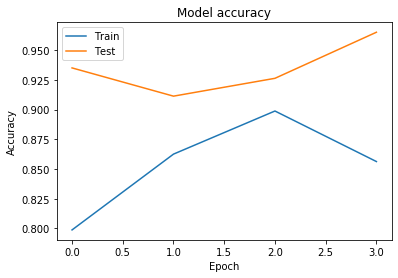

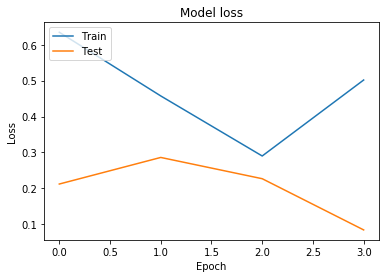

Found 4000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/6
100/100 [==============================] - 20s 204ms/step - loss: 0.2503 - acc: 0.9150 - val_loss: 0.0828 - val_acc: 0.9738
Epoch 2/6
100/100 [==============================] - 17s 168ms/step - loss: 0.2382 - acc: 0.9150 - val_loss: 0.0830 - val_acc: 0.9688
Epoch 3/6
100/100 [==============================] - 17s 169ms/step - loss: 0.1935 - acc: 0.9287 - val_loss: 0.1174 - val_acc: 0.9587
Epoch 4/6
100/100 [==============================] - 17s 166ms/step - loss: 0.2558 - acc: 0.9050 - val_loss: 0.0810 - val_acc: 0.9637
Epoch 5/6
100/100 [==============================] - 17s 169ms/step - loss: 0.2539 - acc: 0.9188 - val_loss: 0.0848 - val_acc: 0.9688
Epoch 6/6
100/100 [==============================] - 17s 166ms/step - loss: 0.1547 - acc: 0.9450 - val_loss: 0.0835 - val_acc: 0.9688


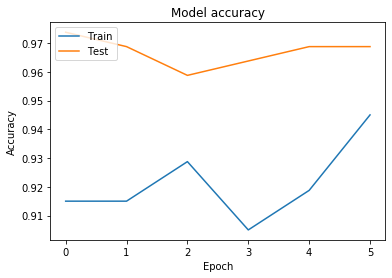

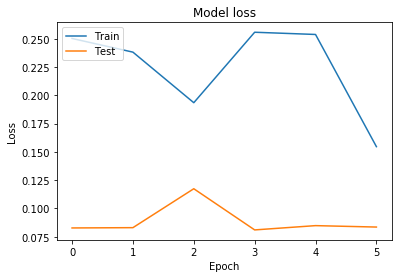

In [35]:
train(model3, dg_train, os.path.join(DATA_ROOT, 'part1'),
      params=dense_params3(),
      layer_count=2,
      validation_directory=os.path.join(DATA_ROOT, 'part2'),
      validation_generator=dg_val)
train(model3, dg_train, os.path.join(DATA_ROOT, 'part1'),
      params=base_params3(),
      layer_count=19,
      epochs=6,
      validation_generator=dg_val,
      validation_directory=os.path.join(DATA_ROOT, 'part2'))

model4: Adding dropout: RUINS THE TRAINING!

In [49]:
def new_model4(dropout=0.5):
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3), pooling='avg')
    x = base_model.output
    x = Dense(1024, activation='relu')(x)
    x = Dropout(dropout)(x)
    x = Dense(1, activation='sigmoid')(x)
    return Model(inputs=base_model.input, outputs=x)

In [50]:
model4 = new_model4()

In [51]:
model4.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128

One more layer to train.

In [58]:
def dense_params4():
    return {'optimizer': Adam(decay=0.001),
               'loss': 'binary_crossentropy',
               'metrics': ['accuracy']}
def base_params4():
    return {'optimizer': Adam(lr=0.00003),
              'loss': 'binary_crossentropy',
              'metrics': ['accuracy']}

Found 4000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/8
100/100 [==============================] - 20s 200ms/step - loss: 0.2093 - acc: 0.9275 - val_loss: 0.1104 - val_acc: 0.9563
Epoch 2/8
100/100 [==============================] - 14s 142ms/step - loss: 0.1806 - acc: 0.9363 - val_loss: 0.2061 - val_acc: 0.9400
Epoch 3/8
100/100 [==============================] - 15s 150ms/step - loss: 0.2675 - acc: 0.9225 - val_loss: 0.0933 - val_acc: 0.9613
Epoch 4/8
100/100 [==============================] - 14s 141ms/step - loss: 0.2222 - acc: 0.9175 - val_loss: 0.0697 - val_acc: 0.9688
Epoch 5/8
100/100 [==============================] - 14s 143ms/step - loss: 0.0956 - acc: 0.9625 - val_loss: 0.0670 - val_acc: 0.9762
Epoch 6/8
100/100 [==============================] - 15s 155ms/step - loss: 0.1358 - acc: 0.9525 - val_loss: 0.0617 - val_acc: 0.9762
Epoch 7/8
100/100 [==============================] - 15s 147ms/step - loss: 0.1505 - acc: 0.9463 - val_loss: 0.05

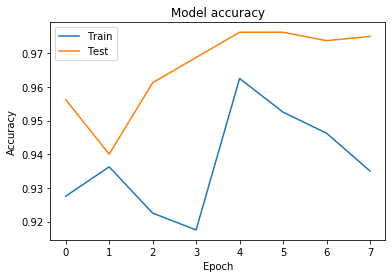

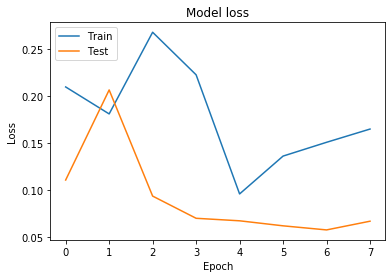

Found 4000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 24s 238ms/step - loss: 0.1023 - acc: 0.9587 - val_loss: 0.0583 - val_acc: 0.9725
Epoch 2/4
100/100 [==============================] - 18s 177ms/step - loss: 0.1455 - acc: 0.9450 - val_loss: 0.0832 - val_acc: 0.9675
Epoch 3/4
100/100 [==============================] - 18s 176ms/step - loss: 0.0768 - acc: 0.9725 - val_loss: 0.0530 - val_acc: 0.9725
Epoch 4/4
100/100 [==============================] - 17s 173ms/step - loss: 0.0893 - acc: 0.9688 - val_loss: 0.0577 - val_acc: 0.9712


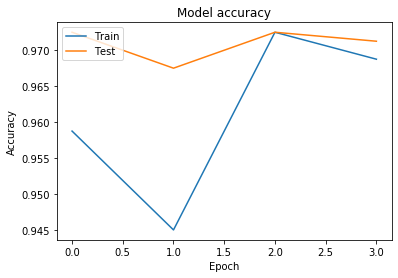

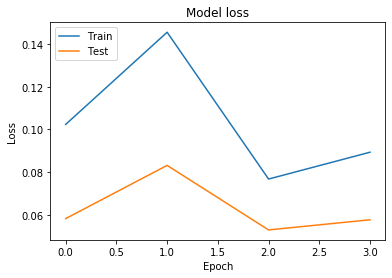

In [59]:

train(model4, dg_train, os.path.join(DATA_ROOT, 'part1'),
      params=dense_params4(),
      layer_count=3,
      epochs=8,
      validation_directory=os.path.join(DATA_ROOT, 'part2'),
      validation_generator=dg_val)
train(model4, dg_train, os.path.join(DATA_ROOT, 'part1'),
      params=base_params4(),
      layer_count=20,
      epochs=4,
      validation_generator=dg_val,
      validation_directory=os.path.join(DATA_ROOT, 'part2'))

model6: smaller FCL

In [72]:
def new_model6(dropout=0.5, n=1024, pooling='avg'):
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3), pooling=pooling)
    x = base_model.output
    x = Dense(n, activation='relu')(x)
    x = Dropout(dropout)(x)
    x = Dense(1, activation='sigmoid')(x)
    return Model(inputs=base_model.input, outputs=x)
def dense_params6(decay=0.0):
    return {'optimizer': Adam(decay=decay),
               'loss': 'binary_crossentropy',
               'metrics': ['accuracy']}
def base_params6(lr=0.0001):
    return {'optimizer': Adam(lr=lr),
              'loss': 'binary_crossentropy',
              'metrics': ['accuracy']}

Creating the model
Found 4000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/8
100/100 [==============================] - 23s 230ms/step - loss: 1.4954 - acc: 0.7463 - val_loss: 0.1695 - val_acc: 0.9463
Epoch 2/8
100/100 [==============================] - 15s 147ms/step - loss: 0.4772 - acc: 0.8438 - val_loss: 0.1245 - val_acc: 0.9525
Epoch 3/8
100/100 [==============================] - 14s 140ms/step - loss: 0.3928 - acc: 0.8475 - val_loss: 0.1823 - val_acc: 0.9287
Epoch 4/8
100/100 [==============================] - 14s 135ms/step - loss: 0.3448 - acc: 0.8450 - val_loss: 0.1215 - val_acc: 0.9563
Epoch 5/8
100/100 [==============================] - 14s 136ms/step - loss: 0.2761 - acc: 0.8850 - val_loss: 0.1273 - val_acc: 0.9575
Epoch 6/8
100/100 [==============================] - 14s 142ms/step - loss: 0.3133 - acc: 0.8650 - val_loss: 0.1383 - val_acc: 0.9450
Epoch 7/8
100/100 [==============================] - 14s 138ms/step - loss: 0.2327 - acc: 0.90

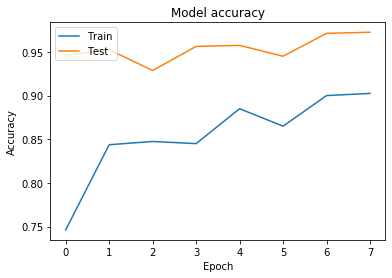

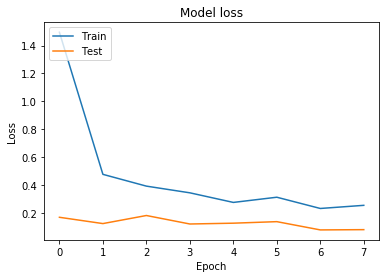

Found 4000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 25s 248ms/step - loss: 0.2424 - acc: 0.8937 - val_loss: 0.0742 - val_acc: 0.9675
Epoch 2/4
100/100 [==============================] - 17s 170ms/step - loss: 0.2399 - acc: 0.8937 - val_loss: 0.0795 - val_acc: 0.9663
Epoch 3/4
100/100 [==============================] - 16s 164ms/step - loss: 0.1901 - acc: 0.9313 - val_loss: 0.0717 - val_acc: 0.9738
Epoch 4/4
100/100 [==============================] - 16s 162ms/step - loss: 0.2336 - acc: 0.9038 - val_loss: 0.0688 - val_acc: 0.9762


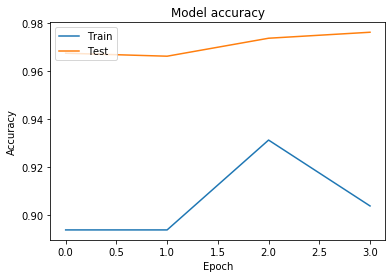

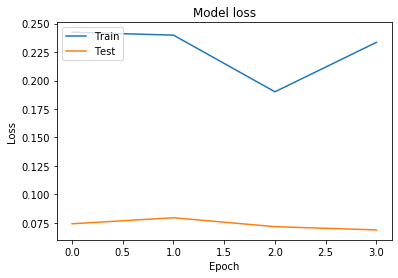

In [73]:
print("Creating the model")
model6 = new_model6(n=256, pooling='max')
# model6 = new_model3()
train(model6, dg_train, os.path.join(DATA_ROOT, 'part1'),
      params=dense_params6(decay=0.001),
      layer_count=3,
      epochs=8,
      validation_directory=os.path.join(DATA_ROOT, 'part2'),
      validation_generator=dg_val)
train(model6, dg_train, os.path.join(DATA_ROOT, 'part1'),
      params=base_params6(lr=0.00003),
      layer_count=20,
      epochs=4,
      validation_generator=dg_val,
      validation_directory=os.path.join(DATA_ROOT, 'part2'))


Creating the model
Found 4000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/8
100/100 [==============================] - 23s 226ms/step - loss: 0.4214 - acc: 0.8238 - val_loss: 0.1624 - val_acc: 0.9350
Epoch 2/8
100/100 [==============================] - 13s 134ms/step - loss: 0.3790 - acc: 0.8450 - val_loss: 0.3483 - val_acc: 0.8588
Epoch 3/8
100/100 [==============================] - 14s 140ms/step - loss: 0.3025 - acc: 0.8825 - val_loss: 0.0876 - val_acc: 0.9663
Epoch 4/8
100/100 [==============================] - 14s 142ms/step - loss: 0.1858 - acc: 0.9237 - val_loss: 0.0693 - val_acc: 0.9750
Epoch 5/8
100/100 [==============================] - 14s 136ms/step - loss: 0.2206 - acc: 0.9075 - val_loss: 0.0979 - val_acc: 0.9575
Epoch 6/8
100/100 [==============================] - 15s 149ms/step - loss: 0.2008 - acc: 0.9075 - val_loss: 0.1033 - val_acc: 0.9537
Epoch 7/8
100/100 [==============================] - 14s 143ms/step - loss: 0.2421 - acc: 0.89

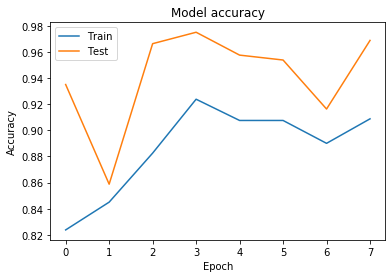

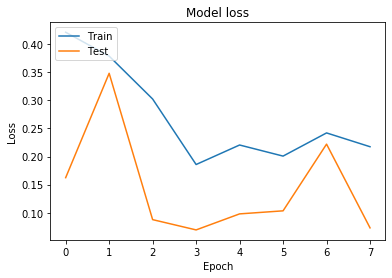

Found 4000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 27s 273ms/step - loss: 0.2262 - acc: 0.9087 - val_loss: 0.0773 - val_acc: 0.9750
Epoch 2/4
100/100 [==============================] - 18s 180ms/step - loss: 0.2080 - acc: 0.9038 - val_loss: 0.0689 - val_acc: 0.9738
Epoch 3/4
100/100 [==============================] - 18s 179ms/step - loss: 0.2097 - acc: 0.9100 - val_loss: 0.0749 - val_acc: 0.9738
Epoch 4/4
100/100 [==============================] - 18s 176ms/step - loss: 0.1869 - acc: 0.9262 - val_loss: 0.0716 - val_acc: 0.9788


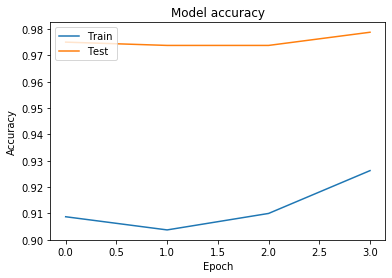

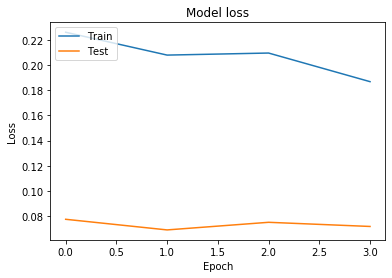

In [77]:
print("Creating the model")
model7 = new_model6(n=256, pooling='avg')
# model6 = new_model3()
train(model7, dg_train, os.path.join(DATA_ROOT, 'part1'),
      params=dense_params6(decay=0.001),
      layer_count=3,
      epochs=8,
      validation_directory=os.path.join(DATA_ROOT, 'part2'),
      validation_generator=dg_val)
train(model7, dg_train, os.path.join(DATA_ROOT, 'part1'),
      params=base_params6(lr=0.00003),
      layer_count=20,
      epochs=4,
      validation_generator=dg_val,
      validation_directory=os.path.join(DATA_ROOT, 'part2'))